In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import tensorflow.keras as tf
import seaborn as sns

In [27]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


In [ ]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.shape

(7043, 21)

In [ ]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data = data.drop(["customerID"], axis=1)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [ ]:
y = data['Churn']
x = data.drop(['Churn'], axis=1)

In [ ]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
x = x.apply(pd.to_numeric, errors='coerce')

In [ ]:
x = x.fillna(x.mean())

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.99497138],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.17387565],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -0.96039939],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.85518222],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.87277729],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  2.01391739]])

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.219500e-17,-4.842546e-17,7.162933e-17,1.069396e-16,-2.421273e-17,7.869137e-17,-1.513296e-17,8.575342e-18,6.809830e-17,2.295165e-17,-4.539887e-17,-3.127478e-17,2.169057e-17,7.062046e-18,-7.566478e-17,-5.952296e-17,-1.160193e-17,-6.406285e-17,8.070910e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.009559e+00,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.318165e+00,-3.054010e+00,-9.915883e-01,-1.183234e+00,-9.188378e-01,-1.029919e+00,-1.027910e+00,-9.252621e-01,-1.113495e+00,-1.121405e+00,-8.282069e-01,-1.205113e+00,-1.474052e+00,-1.545860e+00,-9.998503e-01
25%,-1.009559e+00,-4.399165e-01,-9.666223e-01,-6.540119e-01,-9.516817e-01,3.274383e-01,-9.915883e-01,-1.183234e+00,-9.188378e-01,-1.029919e+00,-1.027910e+00,-9.252621e-01,-1.113495e+00,-1.121405e+00,-8.282069e-01,-1.205113e+00,-5.377472e-01,-9.725399e-01,-8.305558e-01
50%,9.905318e-01,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.372744e-01,3.274383e-01,6.272275e-02,1.722502e-01,2.442417e-01,1.063153e-01,1.086002e-01,2.355183e-01,1.652594e-02,8.502786e-03,-8.282069e-01,8.297975e-01,3.985577e-01,1.857327e-01,-3.897629e-01
75%,9.905318e-01,-4.399165e-01,1.034530e+00,1.529024e+00,9.214551e-01,3.274383e-01,1.117034e+00,1.722502e-01,1.407321e+00,1.242550e+00,1.245111e+00,1.396299e+00,1.146547e+00,1.138411e+00,3.712710e-01,8.297975e-01,3.985577e-01,8.338335e-01,6.637555e-01
max,9.905318e-01,2.273159e+00,1.034530e+00,1.529024e+00,1.613701e+00,3.274383e-01,1.117034e+00,1.527734e+00,1.407321e+00,1.242550e+00,1.245111e+00,1.396299e+00,1.146547e+00,1.138411e+00,1.570749e+00,8.297975e-01,1.334863e+00,1.794352e+00,2.826469e+00


In [ ]:
y.value_counts()

,count
Churn,
0,5174
1,1869


In [28]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.8,random_state=7)

In [29]:
ytrain.value_counts()

,count
Churn,
0,4153
1,1481


In [30]:
x.shape

(7043, 19)

In [31]:
model = tf.models.Sequential()
model.add(tf.layers.Dense(128, activation='relu'))
model.add(tf.layers.Dense(64,activation='relu'))
model.add(tf.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size=50, epochs=100, verbose=1, validation_split=0.2 )

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7524 - loss: 0.5087 - val_accuracy: 0.8057 - val_loss: 0.4210
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7987 - loss: 0.4142 - val_accuracy: 0.8066 - val_loss: 0.4161
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8083 - loss: 0.4031 - val_accuracy: 0.8021 - val_loss: 0.4157
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8049 - loss: 0.4130 - val_accuracy: 0.8030 - val_loss: 0.4176
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8135 - loss: 0.3938 - val_accuracy: 0.7959 - val_loss: 0.4168
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8056 - loss: 0.4145 - val_accuracy: 0.8004 - val_loss: 0.4183
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8187 - loss: 0.3908 - val_accuracy: 0.7906 - val_loss: 0.4244
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8264 - loss: 0.3826 - val_accuracy: 0.7968 - v

In [32]:
ypred = model.predict(xtest)
ypred = ypred.argmax(axis=-1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [33]:
accuracy_score(ytest, ypred)

0.7246273953158269

<Axes: >

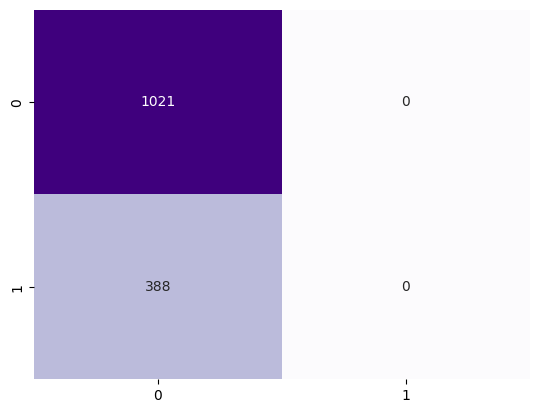

In [34]:
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)